In [1]:
using CausalForest
using Plots
using StatsBase

┌ Info: Precompiling CausalForest [31bdf679-24a7-499a-9be9-b214c66174ea]
└ @ Base loading.jl:1423


In [2]:
indices,X,T,Y = load_data("causal");
Xtest = rand(Float64, (1000, size(X, 2)));
Xtest[:, 1] =  LinRange(0, 1, 1000);
true_effect = Xtest[:, 1].>0.5;

# Subsampling not honest

In [3]:
cf1 = build_forest(false, false, Y, T, X, false, -1, 100);
pred1 = apply_forest(cf1, Xtest);

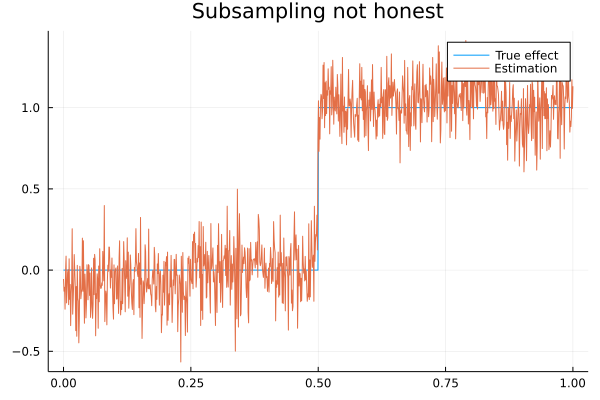

In [4]:
plot(Xtest[:, 1], [true_effect, pred1], label=["True effect" "Estimation"], title = "Subsampling not honest", fmt = :png)

In [5]:
rmsd(float(true_effect), pred1)

0.16058630634725757

# Subsampling honest

In [6]:
cf3 = build_forest(false, true, Y, T, X, false, -1, 100);
pred3 = apply_forest(cf3, Xtest);

In [7]:
rmsd(float(true_effect), pred3)

0.06085283120430657

# Bootstrap not honest

In [8]:
cf5 = build_forest(true, false, Y, T, X, false, -1, 100);
pred5 = apply_forest(cf5, Xtest);

In [9]:
rmsd(float(true_effect), pred5)

0.15706832531366527

# Bootstrap honest

In [10]:
cf7 = build_forest(true, true, Y, T, X, false, -1, 100);
pred7 = apply_forest(cf7, Xtest);

In [11]:
rmsd(float(true_effect), pred7)

0.0643037055533459

# 500 arbres

# Subsampling not honest

In [12]:
cf1 = build_forest(false, false, Y, T, X, false, -1, 500);
pred1 = apply_forest(cf1, Xtest);

In [13]:
rmsd(float(true_effect), pred1)

0.1622393382768181

# Subsampling honest

In [14]:
cf3 = build_forest(false, true, Y, T, X, false, -1, 500);
pred3 = apply_forest(cf3, Xtest);

In [15]:
rmsd(float(true_effect), pred3)

0.056258868078201324

# Bootstrap not honest

In [16]:
cf5 = build_forest(true, false, Y, T, X, false, -1, 500);
pred5 = apply_forest(cf5, Xtest);

In [17]:
rmsd(float(true_effect), pred5)

0.15496553245440353

# Bootstrap honest

In [18]:
cf7 = build_forest(true, true, Y, T, X, false, -1, 500);
pred7 = apply_forest(cf7, Xtest);

In [19]:
rmsd(float(true_effect), pred7)

0.05895075564619156

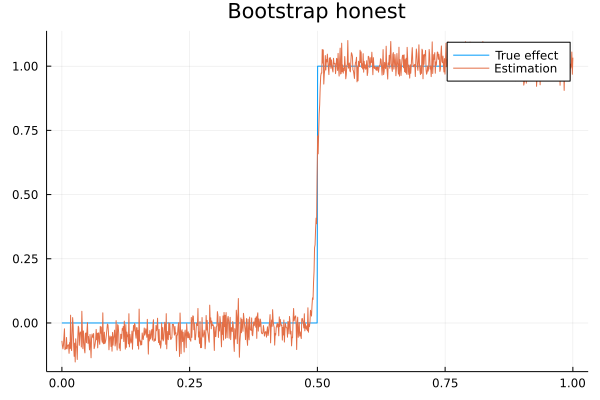

In [20]:
plot(Xtest[:, 1], [true_effect, pred7], label=["True effect" "Estimation"], title = "Bootstrap honest", fmt = :png)